In [85]:
import os
directory = "datasets"
files = os.listdir(directory)

In [86]:
import pandas as pd

directory = "datasets"

data = pd.concat(
    [
        pd.read_excel(os.path.join(directory, file)).rename(
            columns=lambda x: x.strip().replace(" ", "_").translate(str.maketrans("", "", r"""!"#$%&'()*+,./:;<=>?@[\]^`{|}~"""))
        )
        for file in os.listdir(directory)
        if file.endswith((".xlsx", ".xls"))
    ],
    ignore_index=True, 
)



In [87]:
# Calculate resume and job description similarity (Cosine Similarity)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
resume_jd_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    jd = data['Job_Description'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, jd]))[0, 1]
    resume_jd_similarity.append(similarity)
data['resume_jd_similarity'] = resume_jd_similarity

In [88]:
# Calculate resume and transcript similarity (Cosine Similarity)
resume_transcript_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    transcript = data['Transcript'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, transcript]))[0, 1]
    resume_transcript_similarity.append(similarity)
data['resume_transcript_similarity'] = resume_transcript_similarity

In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each transcript
data['sentiment'] = data['Transcript'].apply(lambda transcript: sia.polarity_scores(transcript)['compound'])

# Overall average sentiment score
average_sentiment = data['sentiment'].mean()




In [90]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Compute lexical diversity for each transcript
data['lexical_diversity'] = data['Transcript'].apply(lexical_diversity)

# Calculate statistics
average_diversity = data['lexical_diversity'].mean()


'''Lexical diversity measures the variety of unique words in a text relative to the total number of words. 
'''


'Lexical diversity measures the variety of unique words in a text relative to the total number of words. \n'

In [91]:
# Length of transcript (number of words)
data['transcript_length_words'] = data['Transcript'].apply(lambda x: len(x.split()))

# Calculate statistics
average_length = data['transcript_length_words'].mean()
min_length = data['transcript_length_words'].min()
max_length = data['transcript_length_words'].max()


In [92]:
#Reason for Decision Length
data['reason_length'] = data['Reason_for_decision'].str.split().apply(len)


In [93]:
# Resume length (number of words)
data['resume_length'] = data['Resume'].apply(lambda x: len(x.split()))

In [94]:
#Word Count Ratio
data['word_count_ratio'] = data['transcript_length_words'] / data['resume_length']


In [95]:
#Role to Transcript Similarity

def text_similarity(text1, text2):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(vectors[0], vectors[1])[0, 0]

data['role_transcript_similarity'] = data.apply(
    lambda row: text_similarity(row['Role'], row['Transcript']), axis=1
)


In [96]:
from textblob import TextBlob
data['cultural_fit_sentiment'] = data['Reason_for_decision'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [97]:
#Job Description to Transcript Sentiment Gap
data['jd_transcript_sentiment_gap'] = data['sentiment'] - data['cultural_fit_sentiment']


In [98]:
#Job Description Length
data['job_desc_length'] = data['Job_Description'].str.split().apply(len)


In [99]:
#Role to Resume Similarity
data['role_resume_similarity'] = data.apply(
    lambda row: text_similarity(row['Role'], row['Resume']), axis=1
)


In [100]:
#Combined Text Similarity
data['combined_text_similarity'] = (
    data['resume_jd_similarity'] + data['resume_transcript_similarity']
) / 2


In [101]:
#Sentiment to Lexical Diversity Ratio
data['sentiment_to_diversity_ratio'] = data['sentiment'] / data['lexical_diversity']


In [102]:
#clarity score
import textstat
data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))


In [103]:
#confidence score
data['confidence_score'] = data['Transcript'].apply(lambda x: x.count('I think') + x.count('Maybe'))


In [104]:
#Clarity and Confidence Interaction
data['clarity_confidence_interaction'] = data['clarity_score'] * data['confidence_score']


In [105]:
#Soft Skills
from textblob import TextBlob

data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [106]:
# Length of transcript (number of characters)
data['transcript_length_characters'] = data['Transcript'].apply(len)

# Calculate statistics
average_length = data['transcript_length_characters'].mean()
min_length = data['transcript_length_characters'].min()
max_length = data['transcript_length_characters'].max()

In [107]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Job_Description']), axis=1)


In [108]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match2'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Transcript']), axis=1)


In [109]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match3'] = data.apply(lambda row: compute_similarity(row['Job_Description'], row['Transcript']), axis=1)


In [110]:
# Job Description Experience Match (Simple matching based on keywords, could be improved)
data['job_description_experience_match'] = data.apply(lambda row: len(set(row['Resume'].split()) & set(row['Job_Description'].split())), axis=1)


In [111]:
#job score
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job_Description'], row['Transcript']), axis=1)


In [112]:
#job description complexity
import textstat
data['job_desc_complexity'] = data['Job_Description'].apply(lambda x: textstat.flesch_reading_ease(x))

In [113]:
data['num_words_in_transcript'] = data['Transcript'].apply(lambda x: len(x.split()))

In [114]:
#interaction quality check
data['interaction_quality'] = data['num_words_in_transcript'] * data['sentiment']

In [115]:
# Text complexity (resume and transcript - using a simple metric like Flesch Reading Ease)
def text_complexity(text):
    # Implement text complexity (e.g., Flesch Reading Ease)
    # Here's a placeholder function:
    return len(text.split()) / len(set(text.split()))  # A basic metric

data['text_complexity_transcript'] = data['Transcript'].apply(text_complexity)
data['text_complexity_resume'] = data['Resume'].apply(text_complexity)


In [116]:
# Encoding the target variable (select/reject)
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['decision'] = le.fit_transform(data['decision'])  # 0: reject, 1: select


In [117]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason_for_decision', 'Job_Description', 'resume_jd_similarity',
       'resume_transcript_similarity', 'sentiment', 'lexical_diversity',
       'transcript_length_words', 'reason_length', 'resume_length',
       'word_count_ratio', 'role_transcript_similarity',
       'cultural_fit_sentiment', 'jd_transcript_sentiment_gap',
       'job_desc_length', 'role_resume_similarity', 'combined_text_similarity',
       'sentiment_to_diversity_ratio', 'clarity_score', 'confidence_score',
       'clarity_confidence_interaction', 'soft_skills_sentiment',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'job_description_experience_match', 'job_fit_score',
       'job_desc_complexity', 'num_words_in_transcript', 'interaction_quality',
       'text_complexity_transcript', 'text_complexity_resume'],
      dtype='object')

In [118]:
#Select features for model training (removed the removed features)
X = data[[
    'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words', 'reason_length',
       'resume_length', 'word_count_ratio', 'role_transcript_similarity',
       'cultural_fit_sentiment', 'jd_transcript_sentiment_gap',
       'job_desc_length', 'role_resume_similarity', 'combined_text_similarity',
       'sentiment_to_diversity_ratio', 'clarity_score', 'confidence_score',
       'clarity_confidence_interaction', 'soft_skills_sentiment',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'job_description_experience_match', 'job_fit_score',
       'job_desc_complexity', 'interaction_quality',
       'text_complexity_transcript', 'text_complexity_resume']
]

y = data['decision']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],               # Tree depth
    'learning_rate': [0.01, 0.1, 0.3],   # Step size shrinkage
    'n_estimators': [50, 100, 150]       # Number of boosting rounds
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
xgb_best = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
xgb_y_pred = xgb_best.predict(X_test)
xgb_y_pred_prob = xgb_best.predict_proba(X_test)[:, 1]

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_prob)

# Display the results
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print(f"XGBoost ROC AUC: {xgb_roc_auc:.4f}")


XGBoost Accuracy: 88.94%
XGBoost ROC AUC: 0.9662


In [121]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error']]
print(f"Misclassified Instances:{len(misclassified_xgb)}")


Misclassified Instances:225


In [122]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(
    list(xgb_feature_importance.items()), columns=['Feature', 'Importance']
).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
xgb_impact_analysis


Impact Analysis (XGBoost):


,Feature,Importance
5,reason_length,209.0
9,cultural_fit_sentiment,183.0
15,clarity_score,129.0
24,job_fit_score,122.0
2,resume_transcript_similarity,114.0
11,job_desc_length,106.0
18,soft_skills_sentiment,81.0
25,job_desc_complexity,73.0
1,resume_jd_similarity,73.0
22,technical_skill_match3,72.0


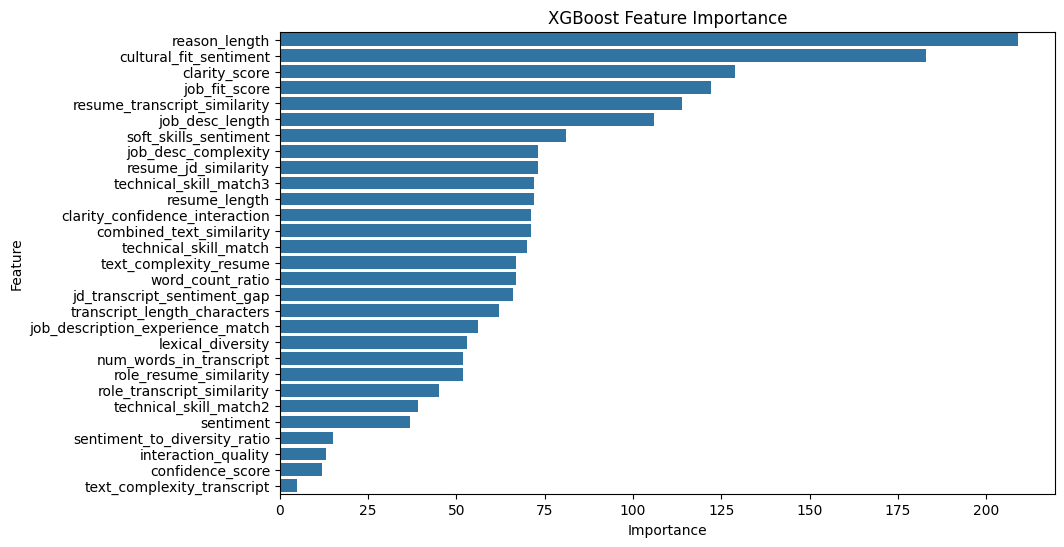

Top 5 most impactful features:
reason_length: Importance = 209.0000
cultural_fit_sentiment: Importance = 183.0000
clarity_score: Importance = 129.0000
job_fit_score: Importance = 122.0000
resume_transcript_similarity: Importance = 114.0000


In [123]:
# --- XGBoost Feature Importance Plot ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

print("Top 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [124]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc

# Add a constant to the features for the intercept term
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_const).fit()

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_const)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_roc_auc = auc(fpr, tpr)

# Output performance
print(f"\nLogistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"Logistic Regression AUC: {log_reg_roc_auc:.4f}")


Optimization terminated successfully.
         Current function value: 0.383377
         Iterations 11

Logistic Regression Accuracy: 84.72%
Logistic Regression AUC: 0.8936


In [125]:
# --- Error Analysis ---
error_analysis = X_test.copy()
error_analysis['True Label'] = y_test
error_analysis['Predicted Label'] = y_pred_binary
error_analysis['Error'] = error_analysis['True Label'] != error_analysis['Predicted Label']  # Flag errors

# Display misclassified samples
misclassified_samples = error_analysis[error_analysis['Error']]
total_misclassified = f"misclassified instances: {len(misclassified_samples)}"
total_misclassified # Display the first few misclassified instances



'misclassified instances: 311'

In [126]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Fit the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Calculate feature importance based on coefficients
lin_reg_feature_importance = abs(lin_reg_model.coef_)  # Use absolute values of coefficients
lin_reg_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lin_reg_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Linear Regression):")
lin_reg_impact_analysis


Impact Analysis (Linear Regression):


,Feature,Importance
28,text_complexity_transcript,13.219155
15,sentiment_to_diversity_ratio,13.028653
3,sentiment,10.023303
10,cultural_fit_sentiment,5.382240
11,jd_transcript_sentiment_gap,4.641063
4,lexical_diversity,1.521984
2,resume_transcript_similarity,0.913282
22,technical_skill_match2,0.499956
9,role_transcript_similarity,0.486423
14,combined_text_similarity,0.465333


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',  # Change to 'roc_auc' if optimizing for AUC in binary classification
    verbose=1,  # Optional: Add verbosity to monitor progress
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
dt_best = grid_search.best_estimator_
dt_y_pred = dt_best.predict(X_test)

# For binary classification: Predict probabilities for ROC AUC calculation
if len(set(y_test)) == 2:  # Binary classification
    dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])
else:  # Multi-class classification
    dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test), multi_class='ovr')

dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Display results
print(f"Decision Tree Accuracy: {dt_accuracy* 100:.2f}")
print(f"Decision Tree ROC AUC: {dt_roc_auc:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree Accuracy: 88.65
Decision Tree ROC AUC: 0.9498


In [128]:
# --- Error Analysis ---
dt_errors = X_test.copy() 
dt_errors['True Label'] = y_test  
dt_errors['Predicted Label'] = dt_best.predict(X_test)  
dt_errors['Error'] = dt_errors['True Label'] != dt_errors['Predicted Label'] 

# Extract misclassified samples
misclassified_dt = dt_errors[dt_errors['Error'] == True]

# Display the first few misclassified instances
print("Misclassified Instances:",len(misclassified_dt))

Misclassified Instances: 231


In [129]:
# --- Impact Analysis (Decision Tree) ---
dt_feature_importance = dt_best.feature_importances_  # Extract feature importances
dt_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# Displaying feature importance
print("Impact Analysis (Decision Tree):")
dt_impact_analysis



Impact Analysis (Decision Tree):


,Feature,Importance
10,cultural_fit_sentiment,0.583993
6,reason_length,0.134715
2,resume_transcript_similarity,0.119013
25,job_fit_score,0.039142
12,job_desc_length,0.028710
11,jd_transcript_sentiment_gap,0.016033
20,transcript_length_characters,0.012755
16,clarity_score,0.012486
14,combined_text_similarity,0.011547
8,word_count_ratio,0.009998


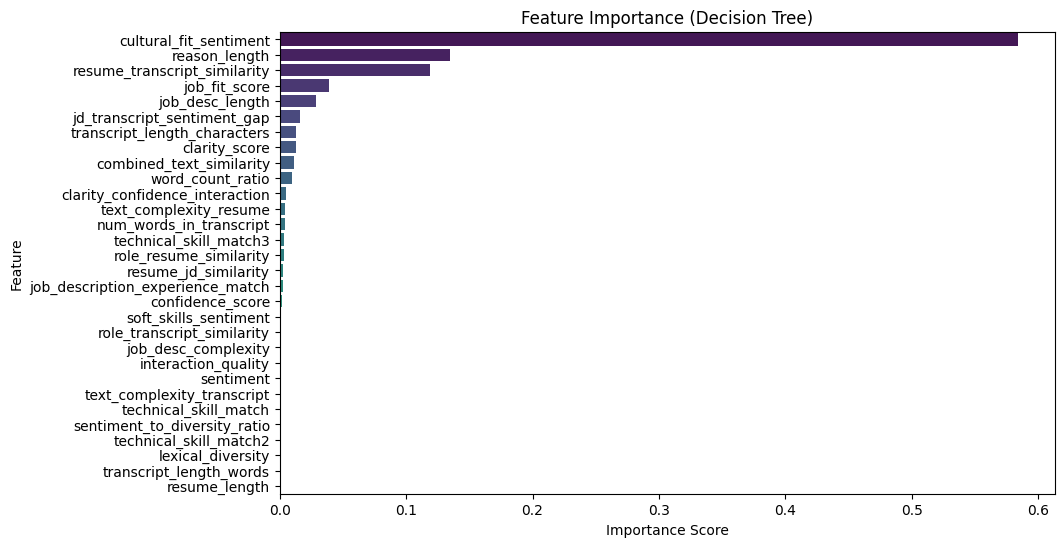


Top 5 most impactful features:
cultural_fit_sentiment: Importance = 0.5840
reason_length: Importance = 0.1347
resume_transcript_similarity: Importance = 0.1190
job_fit_score: Importance = 0.0391
job_desc_length: Importance = 0.0287


In [130]:
# Select the top 5 most impactful features
top_dt_features = dt_impact_analysis.head(5)

# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=dt_impact_analysis,
    palette='viridis',
    hue='Feature',  # Assign the `Feature` column to `hue`
    dodge=False  # Prevent stacking of bars (as there's no grouping here)
)
plt.legend([], [], frameon=False)  # Remove legend for cleaner output
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# --- Summary ---
print("\nTop 5 most impactful features:")
for i, row in top_dt_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV

# Example dataset (replace these with actual data)
# X_train, X_test, y_train, y_test = <your_data_split>

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],  # Reduced grid for faster search
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest with parallel processing
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform grid search with cross-validation
print("Starting Random Forest Grid Search...")
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1)  # Using 'roc_auc' as the scoring metric
grid_search.fit(X_train, y_train)

# Best model from GridSearch
rf_best = grid_search.best_estimator_

# Predictions on test set
rf_y_pred = rf_best.predict(X_test)

# Predict probabilities for ROC-AUC
rf_y_prob = rf_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)

# Display results
print(f"Random Forest Accuracy: {rf_accuracy*100:.4f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")


Starting Random Forest Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest Accuracy: 88.8452
Random Forest ROC-AUC: 0.9627


In [132]:
# Error Analysis
rf_errors = X_test.copy()
rf_errors['True Label'] = y_test
rf_errors['Predicted Label'] = rf_best.predict(X_test)
rf_errors['Error'] = rf_errors['True Label'] != rf_errors['Predicted Label']

# Check if there are any misclassified instances
if not rf_errors['Error'].any():
    print("No misclassified instances found in the test set.")
else:
    # Display the first few misclassified instances
    misclassified_rf = rf_errors[rf_errors['Error']]
    print(f"Total Misclassified Instances: {len(misclassified_rf)}")

Total Misclassified Instances: 227


In [133]:
# Impact Analysis (using feature importances)
rf_feature_importance = rf_best.feature_importances_
rf_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying the top 10 most impactful features
print("Impact Analysis (Random Forest):")
rf_impact_analysis

Impact Analysis (Random Forest):


,Feature,Importance
10,cultural_fit_sentiment,0.307064
11,jd_transcript_sentiment_gap,0.261053
6,reason_length,0.084442
2,resume_transcript_similarity,0.044040
12,job_desc_length,0.024649
16,clarity_score,0.022825
14,combined_text_similarity,0.021877
24,job_description_experience_match,0.019994
25,job_fit_score,0.019907
20,transcript_length_characters,0.014035


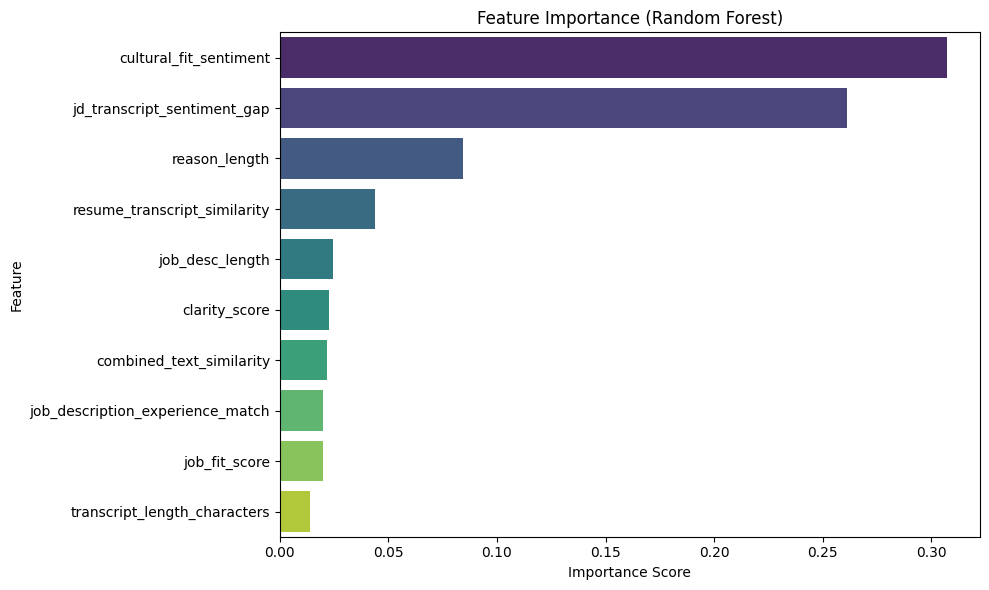

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=rf_impact_analysis.head(10), 
    palette='viridis',
    hue='Feature',  # Assign the `Feature` column to `hue`
    dodge=False  # Prevent stacking of bars (as there's no grouping here)
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [135]:
#XGBoost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],               # Tree depth
    'learning_rate': [0.01, 0.1, 0.3],   # Step size shrinkage
    'n_estimators': [50, 100, 150]       # Number of boosting rounds
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
xgb_best = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
xgb_y_pred = xgb_best.predict(X_test)
xgb_y_pred_prob = xgb_best.predict_proba(X_test)[:, 1]

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_prob)

# Display the results
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print(f"XGBoost ROC AUC: {xgb_roc_auc:.4f}")

XGBoost Accuracy: 88.94%
XGBoost ROC AUC: 0.9662


In [136]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error']]
print(f"Misclassified Instances:{len(misclassified_xgb)}")


Misclassified Instances:225


In [137]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(
    list(xgb_feature_importance.items()), columns=['Feature', 'Importance']
).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
xgb_impact_analysis


Impact Analysis (XGBoost):


,Feature,Importance
5,reason_length,209.0
9,cultural_fit_sentiment,183.0
15,clarity_score,129.0
24,job_fit_score,122.0
2,resume_transcript_similarity,114.0
11,job_desc_length,106.0
18,soft_skills_sentiment,81.0
25,job_desc_complexity,73.0
1,resume_jd_similarity,73.0
22,technical_skill_match3,72.0


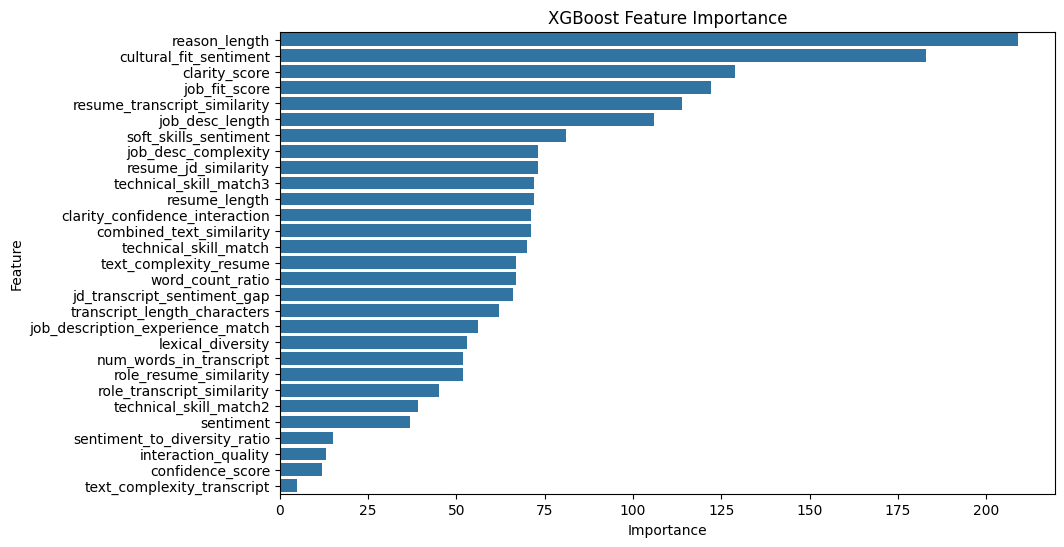

Top 5 most impactful features:
reason_length: Importance = 209.0000
cultural_fit_sentiment: Importance = 183.0000
clarity_score: Importance = 129.0000
job_fit_score: Importance = 122.0000
resume_transcript_similarity: Importance = 114.0000


In [138]:
# --- XGBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

print("Top 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [139]:
# --- Gradient Boosting Classifier ---
from sklearn.ensemble import GradientBoostingClassifier
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Initialize and fit the model using GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and predictions
gb_best = grid_search.best_estimator_
gb_y_pred = gb_best.predict(X_test)

# Evaluation metrics
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])

# Display results
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Gradient Boosting ROC AUC: {gb_roc_auc:.4f}")

Gradient Boosting Accuracy: 88.94%
Gradient Boosting ROC AUC: 0.9651


In [140]:
# --- Error Analysis for Gradient Boosting ---
gb_errors = X_test.copy()
gb_errors['True Label'] = y_test
gb_errors['Predicted Label'] = gb_y_pred  # Use predictions from Gradient Boosting
gb_errors['Error'] = gb_errors['True Label'] != gb_errors['Predicted Label']

# Extracting misclassified instances
misclassified_gb = gb_errors[gb_errors['Error']]
print(f"Misclassified Instances: {len(misclassified_gb)}")


Misclassified Instances: 225


In [141]:
# --- Impact Analysis for Gradient Boosting ---
gb_feature_importance = gb_best.feature_importances_
gb_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the impact analysis
print("Impact Analysis (Gradient Boosting):")
gb_impact_analysis


Impact Analysis (Gradient Boosting):


,Feature,Importance
0,cultural_fit_sentiment,0.541770
1,reason_length,0.152866
2,resume_transcript_similarity,0.092326
3,job_desc_length,0.029390
4,job_fit_score,0.023535
5,clarity_score,0.022477
6,jd_transcript_sentiment_gap,0.019319
7,job_description_experience_match,0.015690
8,combined_text_similarity,0.009801
9,word_count_ratio,0.009415


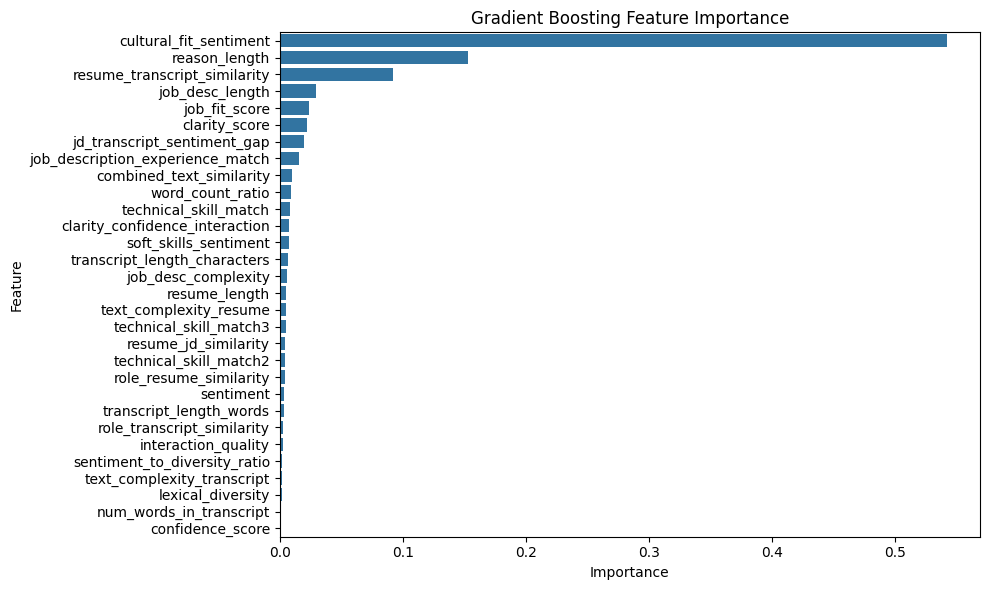


Top 5 most impactful features:
cultural_fit_sentiment: Importance = 0.5418
reason_length: Importance = 0.1529
resume_transcript_similarity: Importance = 0.0923
job_desc_length: Importance = 0.0294
job_fit_score: Importance = 0.0235


In [142]:
# --- Gradient Boosting Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_impact_analysis)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Summary ---
top_gb_features = gb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_gb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [143]:
from sklearn.ensemble import AdaBoostClassifier
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialize AdaBoost Classifier
ada_boost = AdaBoostClassifier(random_state=42)  # Default algorithm is SAMME.R

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best AdaBoost model
ada_boost_best = grid_search.best_estimator_

# Predictions
ada_boost_y_pred = ada_boost_best.predict(X_test)
ada_boost_y_proba = ada_boost_best.predict_proba(X_test)[:, 1]

# Metrics
ada_boost_accuracy = accuracy_score(y_test, ada_boost_y_pred)
ada_boost_roc_auc = roc_auc_score(y_test, ada_boost_y_proba)

# Display results
print(f"AdaBoost Accuracy: {ada_boost_accuracy * 100:.2f}%")
print(f"AdaBoost ROC AUC: {ada_boost_roc_auc:.4f}")

c:\Users\yalla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 87.52%
AdaBoost ROC AUC: 0.9572


In [144]:
# Error Analysis
ada_boost_y_pred = ada_boost_best.predict(X_test)  # Reuse predictions
adaboost_errors = X_test.copy()
adaboost_errors['True Label'] = y_test
adaboost_errors['Predicted Label'] = ada_boost_y_pred
adaboost_errors['Error'] = adaboost_errors['True Label'] != adaboost_errors['Predicted Label']

# Identify misclassified instances
misclassified_adaboost = adaboost_errors[adaboost_errors['Error'] == True]

# Total number of misclassified instances
misclassified_count = len(misclassified_adaboost)
print(f"\nTotal number of misclassified instances: {misclassified_count}")


Total number of misclassified instances: 254


In [145]:
# --- Impact Analysis for AdaBoost ---
try:
    adaboost_feature_importance = ada_boost_best.feature_importances_
    adaboost_impact_analysis = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': adaboost_feature_importance
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Displaying the impact analysis
    print("Impact Analysis (AdaBoost):")
    print(adaboost_impact_analysis)
except AttributeError:
    print("The AdaBoost model does not support feature importances for the current configuration.")


Impact Analysis (AdaBoost):
                             Feature  Importance
0                      reason_length    0.266667
1             cultural_fit_sentiment    0.233333
2                      job_fit_score    0.086667
3       resume_transcript_similarity    0.053333
4             technical_skill_match2    0.033333
5                    job_desc_length    0.033333
6           combined_text_similarity    0.026667
7        jd_transcript_sentiment_gap    0.026667
8                   word_count_ratio    0.020000
9         role_transcript_similarity    0.020000
10               job_desc_complexity    0.020000
11                 lexical_diversity    0.020000
12    clarity_confidence_interaction    0.020000
13                     resume_length    0.013333
14            technical_skill_match3    0.013333
15        text_complexity_transcript    0.013333
16              resume_jd_similarity    0.013333
17                     clarity_score    0.013333
18             soft_skills_sentiment    0

In [146]:
#CatBoost
from catboost import CatBoostClassifier
# --- CatBoost with Hyperparameter Tuning ---
param_grid = {
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [50, 100, 150]
}

# Initializing CatBoost with silent mode
catboost = CatBoostClassifier(silent=True, random_state=42)

# Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,  # Display progress for debugging
    n_jobs=-1   # Utilize all processors for faster computation
)
grid_search.fit(X_train, y_train)

# Extracting the best model and evaluating it
catboost_best = grid_search.best_estimator_
catboost_y_pred = catboost_best.predict(X_test)
catboost_y_proba = catboost_best.predict_proba(X_test)[:, 1]

# Performance Metrics
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_roc_auc = roc_auc_score(y_test, catboost_y_proba)

# Displaying Results
print(f"CatBoost Accuracy: {catboost_accuracy * 100:.2f}%")
print(f"CatBoost ROC AUC: {catboost_roc_auc:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CatBoost Accuracy: 89.43%
CatBoost ROC AUC: 0.9655


In [147]:
# --- Error Analysis for CatBoost ---
catboost_errors = X_test.copy()
catboost_errors['True Label'] = y_test
catboost_errors['Predicted Label'] = catboost_best.predict(X_test)
catboost_errors['Error'] = catboost_errors['True Label'] != catboost_errors['Predicted Label']

# Filtering misclassified instances
misclassified_catboost = catboost_errors[catboost_errors['Error']]

# Displaying Results
print(f"Misclassified Instances (CatBoost): {len(misclassified_catboost)}")



Misclassified Instances (CatBoost): 215


In [148]:
# Impact Analysis: CatBoost Feature Importance
catboost_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use X_train.columns to align with feature importance
    'Importance': catboost_best.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the feature importance
print("Impact Analysis (CatBoost):")
catboost_feature_importance_df


Impact Analysis (CatBoost):


,Feature,Importance
0,cultural_fit_sentiment,35.644437
1,reason_length,19.949304
2,jd_transcript_sentiment_gap,18.086092
3,resume_transcript_similarity,3.672613
4,job_description_experience_match,3.470611
5,technical_skill_match,3.217929
6,job_fit_score,2.381073
7,job_desc_length,1.861917
8,clarity_score,1.694398
9,clarity_confidence_interaction,1.285462


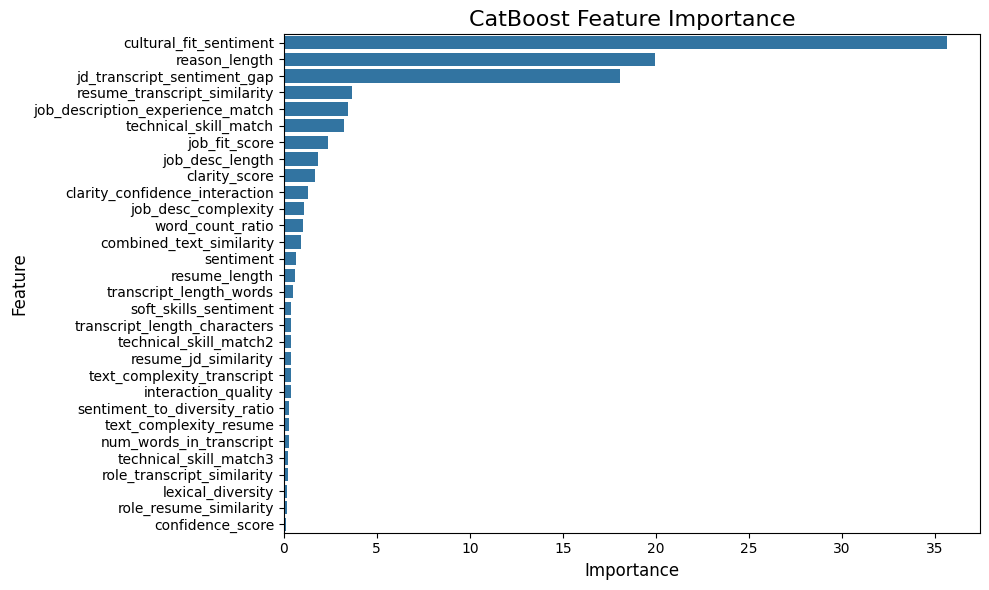


Top 5 most impactful features:
cultural_fit_sentiment: Importance = 35.6444
reason_length: Importance = 19.9493
jd_transcript_sentiment_gap: Importance = 18.0861
resume_transcript_similarity: Importance = 3.6726
job_description_experience_match: Importance = 3.4706


In [149]:
# --- CatBoost Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=catboost_feature_importance_df)
plt.title('CatBoost Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()  # Ensures the plot looks clean
plt.show()

# --- Summary ---
top_catboost_features = catboost_feature_importance_df.head(5)  # Top 5 features by importance

print("\nTop 5 most impactful features:")
for _, row in top_catboost_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [150]:
from sklearn.neural_network import MLPClassifier
# Neural Network (MLPClassifier) with Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# Define the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Utilize all processors for faster computation
    verbose=1   # Show progress
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model and predictions
mlp_best = grid_search.best_estimator_
mlp_y_pred = mlp_best.predict(X_test)

# Performance metrics
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_best.predict_proba(X_test)[:, 1])

# Output results
print(f"MLPClassifier Accuracy: {mlp_accuracy * 100:.2f}%")
print(f"MLPClassifier ROC AUC: {mlp_roc_auc:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
MLPClassifier Accuracy: 74.94%
MLPClassifier ROC AUC: 0.8688


In [151]:
# Error Analysis for MLPClassifier
mlp_errors = X_test.copy()
mlp_errors['True Label'] = y_test
mlp_errors['Predicted Label'] = mlp_y_pred  # Reuse predictions from earlier
mlp_errors['Error'] = mlp_errors['True Label'] != mlp_errors['Predicted Label']

# Extracting misclassified instances
misclassified_mlp = mlp_errors[mlp_errors['Error']]
print(f"Misclassified Instances (MLPClassifier):{len(misclassified_mlp)}")


Misclassified Instances (MLPClassifier):510


In [152]:
from sklearn.inspection import permutation_importance

# Permutation-based Feature Importance
mlp_perm_importance = permutation_importance(mlp_best, X_test, y_test, n_repeats=10, random_state=42)

# Creating a DataFrame for Feature Importance
mlp_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': mlp_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print("Impact Analysis (MLPClassifier):")
mlp_feature_importance_df


Impact Analysis (MLPClassifier):


,Feature,Importance
0,num_words_in_transcript,0.173366
10,cultural_fit_sentiment,0.160983
27,interaction_quality,0.152973
11,jd_transcript_sentiment_gap,0.118919
5,transcript_length_words,0.117002
20,transcript_length_characters,0.068354
12,job_desc_length,0.015872
18,clarity_confidence_interaction,0.009386
17,confidence_score,0.004767
7,resume_length,0.004324


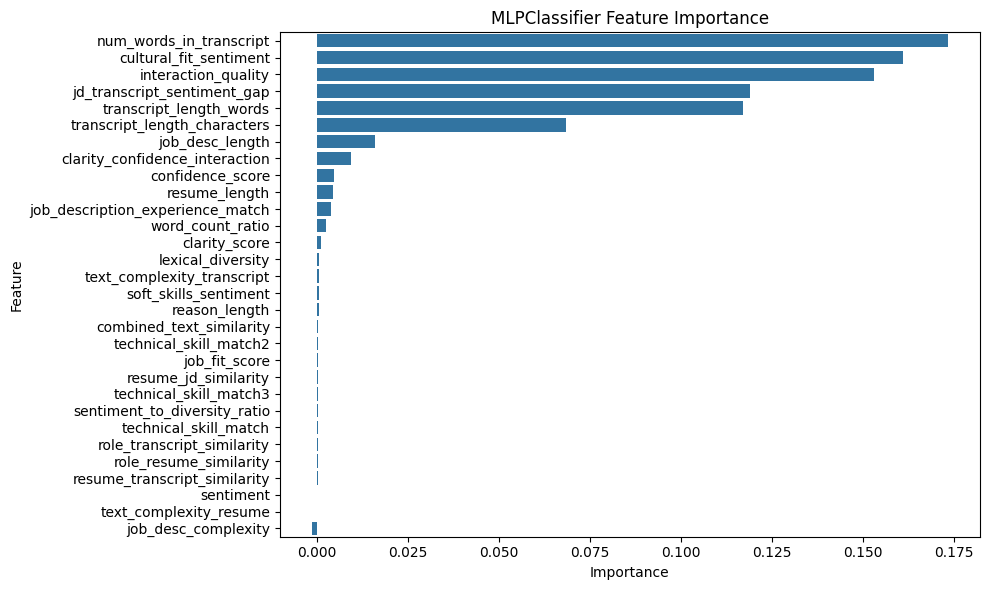


Top 5 most impactful features:
num_words_in_transcript: Importance = 0.1734
cultural_fit_sentiment: Importance = 0.1610
interaction_quality: Importance = 0.1530
jd_transcript_sentiment_gap: Importance = 0.1189
transcript_length_words: Importance = 0.1170


In [153]:
# --- MLPClassifier Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=mlp_feature_importance_df)
plt.title('MLPClassifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Summary ---
top_mlp_features = mlp_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_mlp_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

Model Comparison Table:
                 Model  Accuracy (%)   ROC AUC
6             CatBoost     89.434889  0.965490
3              XGBoost     88.943489  0.966163
4    Gradient Boosting     88.943489  0.965061
2        Random Forest     88.845209  0.962664
1        Decision Tree     88.648649  0.949805
5             AdaBoost     87.518428  0.957170
0  Logistic Regression     84.717445  0.893559
7                  MLP     74.938575  0.868772


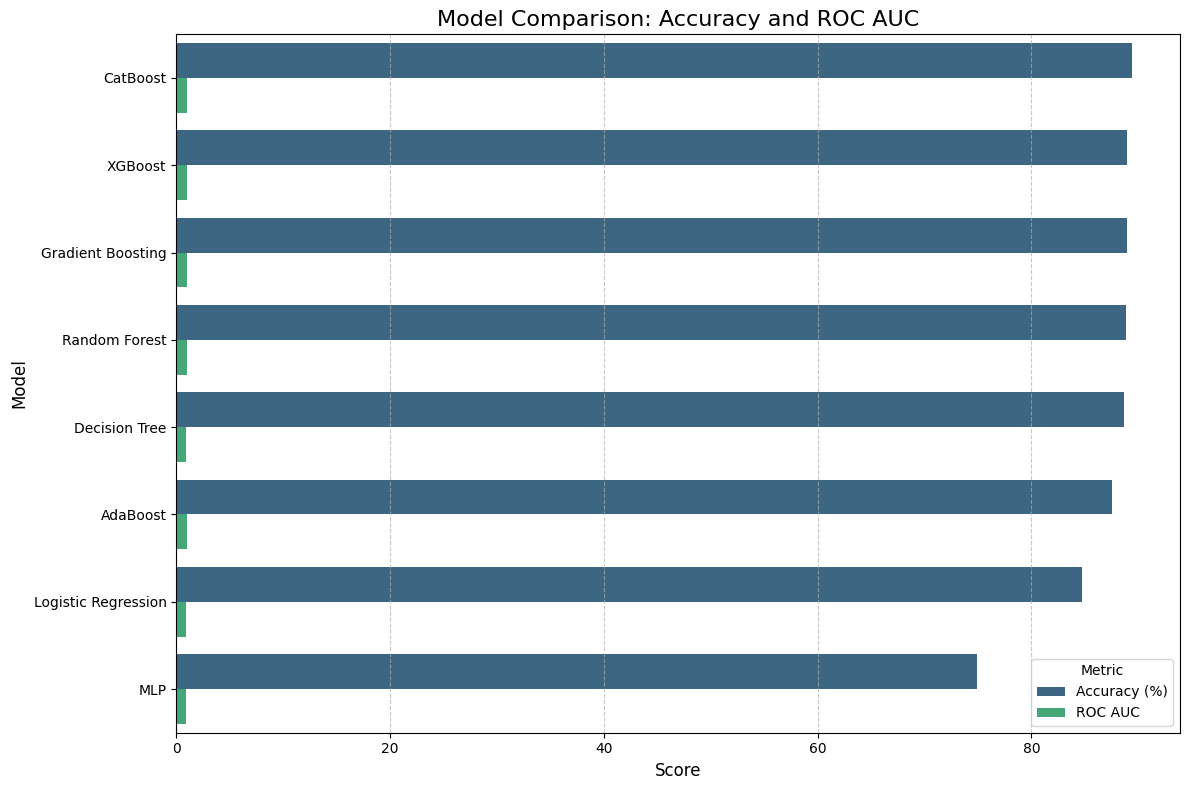


Summary of the Model Comparison:
1. The best-performing model based on Accuracy is: CatBoost with an Accuracy of 89.43%.
2. The best-performing model based on ROC AUC is: XGBoost with a ROC AUC score of 0.97.
3. This comparison highlights the trade-offs between Accuracy and ROC AUC across models.


In [154]:
# Define models and their respective accuracy and ROC AUC scores
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 
    'Gradient Boosting', 'AdaBoost', 'CatBoost', 'MLP'
]

# Accuracy scores from the above calculations
accuracies = [
    log_reg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, 
    gb_accuracy, ada_boost_accuracy, catboost_accuracy, mlp_accuracy
]

# ROC AUC scores from the above calculations
roc_auc_scores = [
    log_reg_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc, 
    gb_roc_auc, ada_boost_roc_auc, catboost_roc_auc, mlp_roc_auc
]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies_percent,
    'ROC AUC': roc_auc_scores
}).sort_values(by='Accuracy (%)', ascending=False)

# Display comparison DataFrame
print("Model Comparison Table:")
print(comparison_df)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df.melt(id_vars='Model', value_vars=['Accuracy (%)', 'ROC AUC']),
    x='value', y='Model', hue='variable', palette='viridis'
)
plt.title('Model Comparison: Accuracy and ROC AUC', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Metric', fontsize=10, loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary
best_accuracy_model = comparison_df.iloc[0]
best_auc_model = comparison_df.sort_values(by='ROC AUC', ascending=False).iloc[0]

print("\nSummary of the Model Comparison:")
print(f"1. The best-performing model based on Accuracy is: {best_accuracy_model['Model']} "
      f"with an Accuracy of {best_accuracy_model['Accuracy (%)']:.2f}%.")
print(f"2. The best-performing model based on ROC AUC is: {best_auc_model['Model']} "
      f"with a ROC AUC score of {best_auc_model['ROC AUC']:.2f}.")
print("3. This comparison highlights the trade-offs between Accuracy and ROC AUC across models.")


 97%|=================== | 7884/8139 [00:14<00:00]       

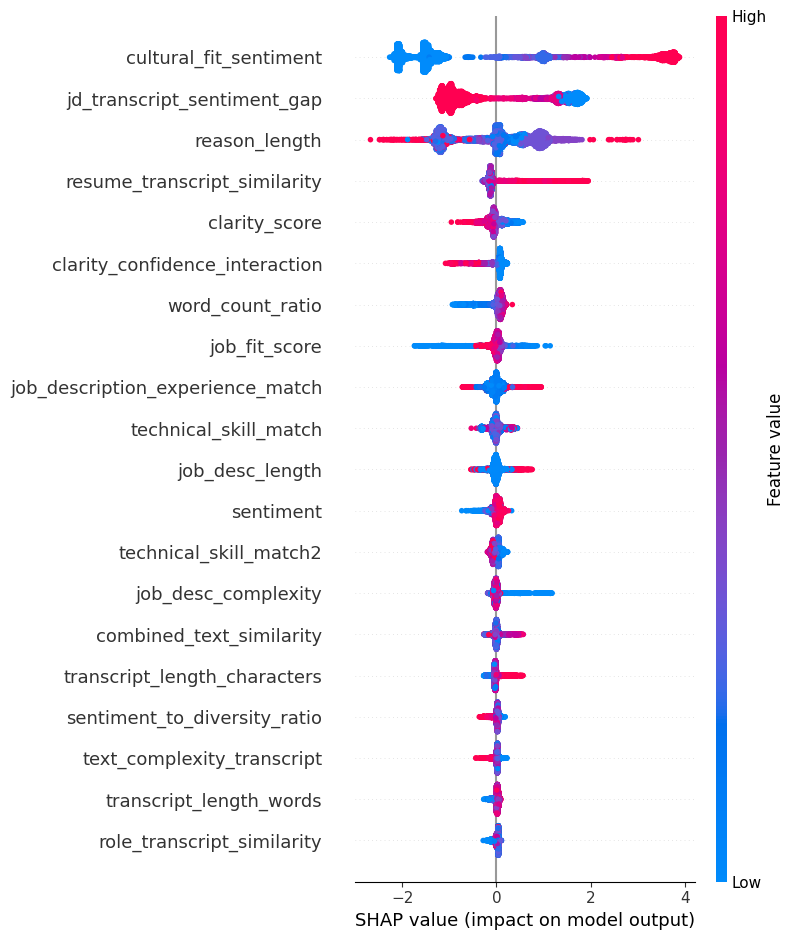

In [170]:
import shap

# Ensure you're using the best model from Gradient Boosting Classifier (gb_best)
explainer = shap.Explainer(catboost_best, X_train)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_train)


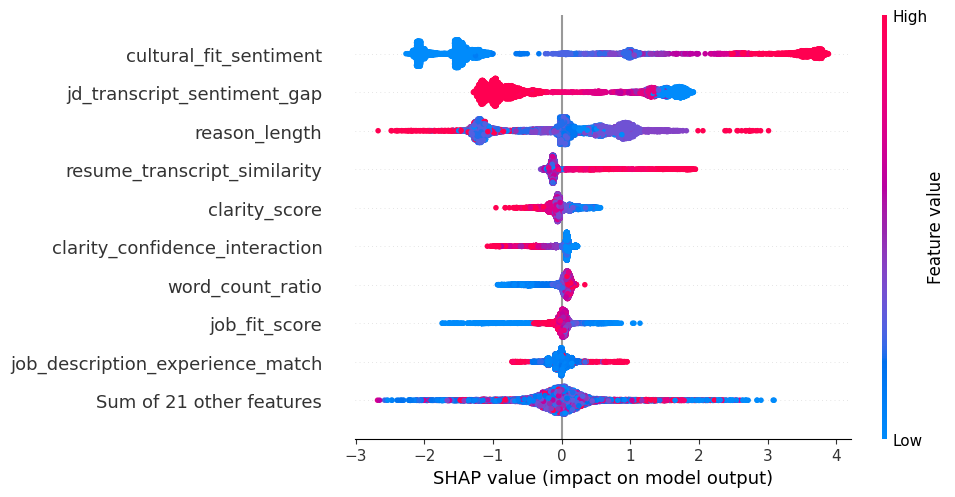

In [171]:
# Beeswarm plot for SHAP values
shap.plots.beeswarm(shap_values)


In [172]:
base_value  = explainer.expected_value
print(f"Base Value: {base_value}")

Base Value: 0.9393138914000074


In [173]:
shap_values_test = explainer(X_test)  



--- SHAP Waterfall Plot for Instance 1 ---


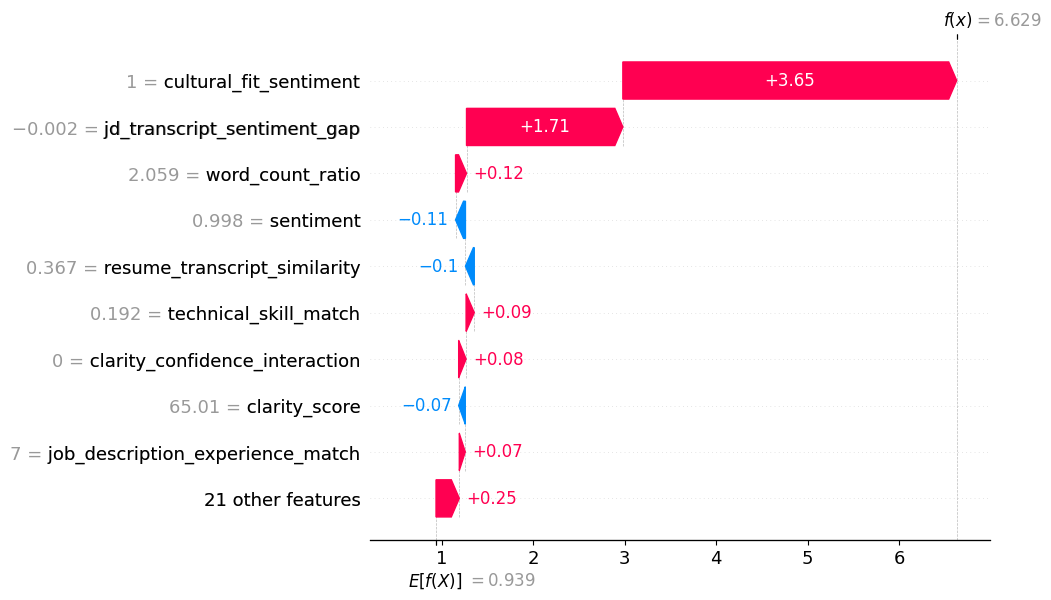


Summary:
Base Probability: 71.8961%
Predicted Probability: 99.8680%

Top Contributing Features:
  - cultural_fit_sentiment: 3.6480 (increases prediction)
  - jd_transcript_sentiment_gap: 1.7081 (increases prediction)
  - word_count_ratio: 0.1197 (increases prediction)
  - sentiment: -0.1080 (decreases prediction)
  - resume_transcript_similarity: -0.0964 (decreases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of 1.0000, contributing 3.6480.
  - jd_transcript_sentiment_gap has a value of -0.0021, contributing 1.7081.
  - word_count_ratio has a value of 2.0593, contributing 0.1197.
  - sentiment has a value of 0.9979, contributing -0.1080.
  - resume_transcript_similarity has a value of 0.3667, contributing -0.0964.

--- SHAP Waterfall Plot for Instance 2 ---


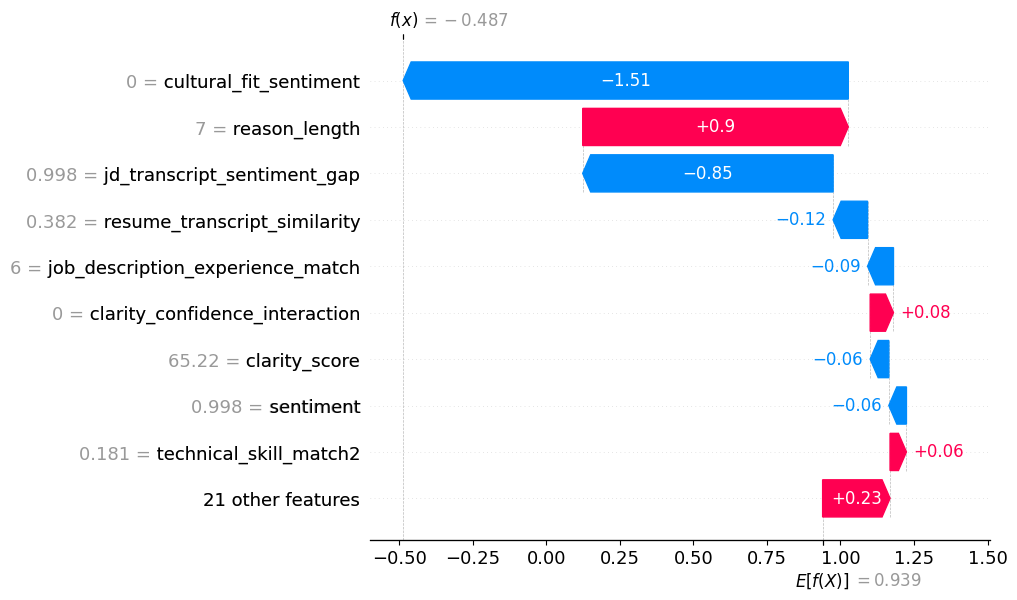


Summary:
Base Probability: 71.8961%
Predicted Probability: 38.0606%

Top Contributing Features:
  - cultural_fit_sentiment: -1.5136 (decreases prediction)
  - reason_length: 0.9032 (increases prediction)
  - jd_transcript_sentiment_gap: -0.8515 (decreases prediction)
  - resume_transcript_similarity: -0.1171 (decreases prediction)
  - job_description_experience_match: -0.0881 (decreases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of 0.0000, contributing -1.5136.
  - reason_length has a value of 7.0000, contributing 0.9032.
  - jd_transcript_sentiment_gap has a value of 0.9982, contributing -0.8515.
  - resume_transcript_similarity has a value of 0.3824, contributing -0.1171.
  - job_description_experience_match has a value of 6.0000, contributing -0.0881.

--- SHAP Waterfall Plot for Instance 3 ---


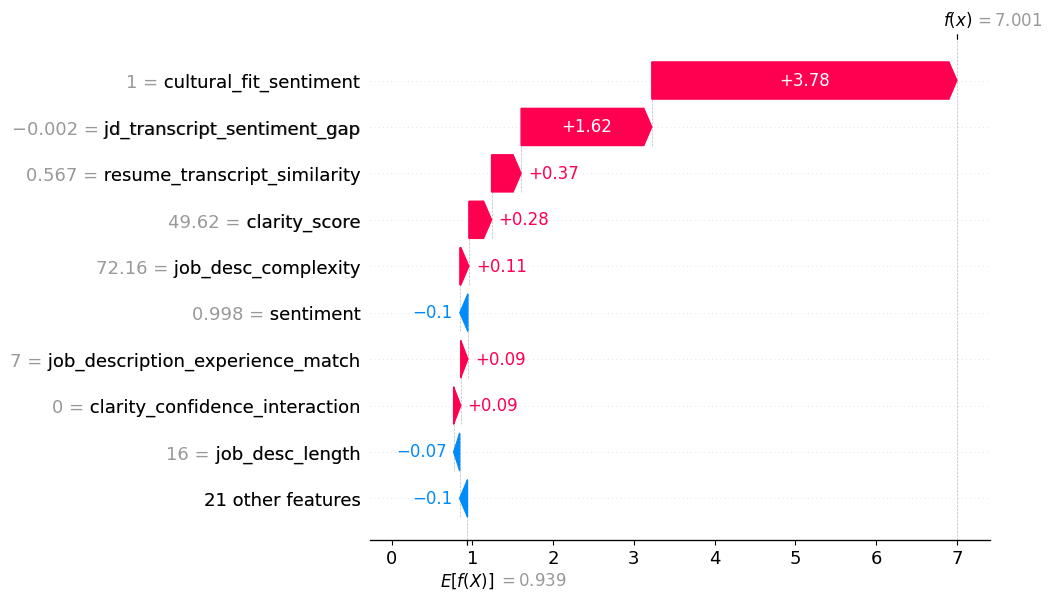


Summary:
Base Probability: 71.8961%
Predicted Probability: 99.9090%

Top Contributing Features:
  - cultural_fit_sentiment: 3.7789 (increases prediction)
  - jd_transcript_sentiment_gap: 1.6187 (increases prediction)
  - resume_transcript_similarity: 0.3656 (increases prediction)
  - clarity_score: 0.2813 (increases prediction)
  - job_desc_complexity: 0.1113 (increases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of 1.0000, contributing 3.7789.
  - jd_transcript_sentiment_gap has a value of -0.0018, contributing 1.6187.
  - resume_transcript_similarity has a value of 0.5666, contributing 0.3656.
  - clarity_score has a value of 49.6200, contributing 0.2813.
  - job_desc_complexity has a value of 72.1600, contributing 0.1113.


In [175]:
# Iterate through the first 3 instances
import numpy as np
for i in range(3):
    instance_index = i
    shap_value = shap_values_test[instance_index]
    
    # Generate the waterfall plot
    print(f"\n--- SHAP Waterfall Plot for Instance {instance_index + 1} ---")
    shap.plots.waterfall(shap_value)
    
    # Extract information for summary
    feature_contributions = shap_value.values
    base_value = shap_value.base_values 
    predicted_value = base_value + feature_contributions.sum() 
    feature_names = shap_value.feature_names
    top_features = sorted(zip(feature_names, feature_contributions), key=lambda x: abs(x[1]), reverse=True)[:5]
    
    # Convert log-odds to probabilities
    base_probability = 1 / (1 + np.exp(-base_value))  
    predicted_probability = 1 / (1 + np.exp(-predicted_value)) 
    
    # Print summary
    print("\nSummary:")
    print(f"Base Probability: {base_probability:.4%}")
    print(f"Predicted Probability: {predicted_probability:.4%}")
    
    print("\nTop Contributing Features:")
    for feature, contribution in top_features:
        direction = "increases" if contribution > 0 else "decreases"
        print(f"  - {feature}: {contribution:.4f} ({direction} prediction)")
    
    #Feature value insight
    print("\nFeature Value Insights:")
    for feature, contribution in top_features:
        feature_index = feature_names.index(feature)
        feature_value = shap_value.data[feature_index]
        print(f"  - {feature} has a value of {feature_value:.4f}, contributing {contribution:.4f}.")


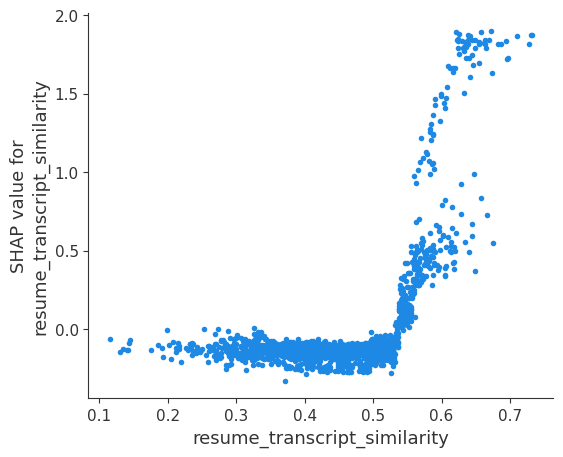

In [177]:
# Dependency Plot Feature 1
features_to_plot = "resume_transcript_similarity" 
shap.dependence_plot(
    ind=features_to_plot, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)


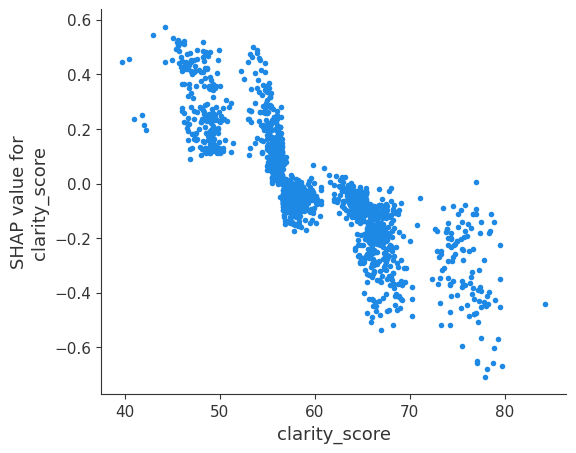

In [178]:
# Dependency Plot Feature 2
feature_name = "clarity_score"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)



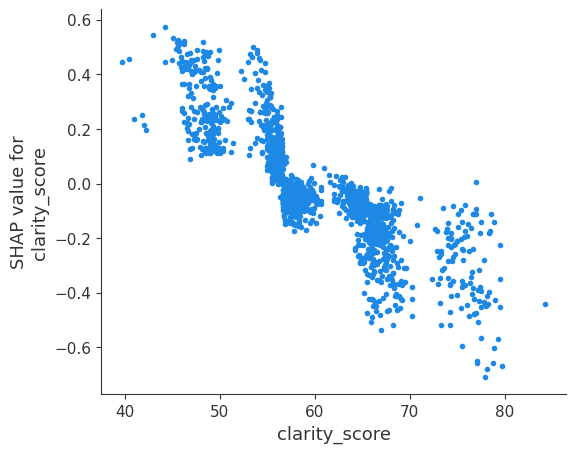

In [179]:
# Dependency Plot Feature 2
feature_name = "clarity_score"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)



In [180]:
from sklearn.inspection import PartialDependenceDisplay

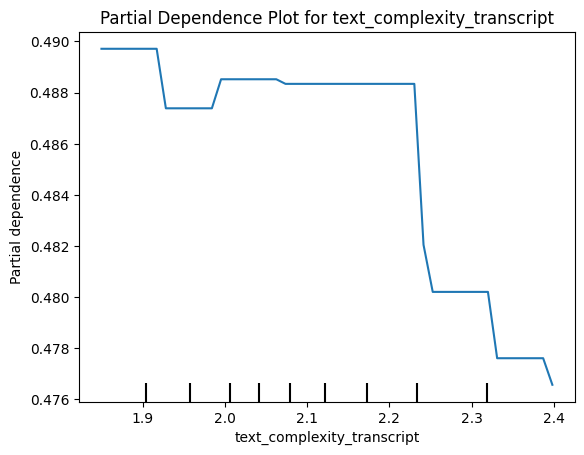

In [182]:
#PartialDependence Plot for Feature
feature_name = "text_complexity_transcript"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=catboost_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,  
    kind="average" 
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

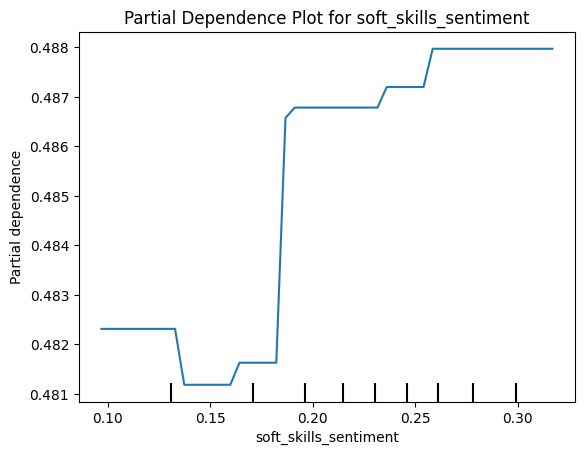

In [183]:
#PartialDependence Plot for Feature2
feature_name = "soft_skills_sentiment"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=catboost_best,
    X=X_test,  
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,
    kind="average"  
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

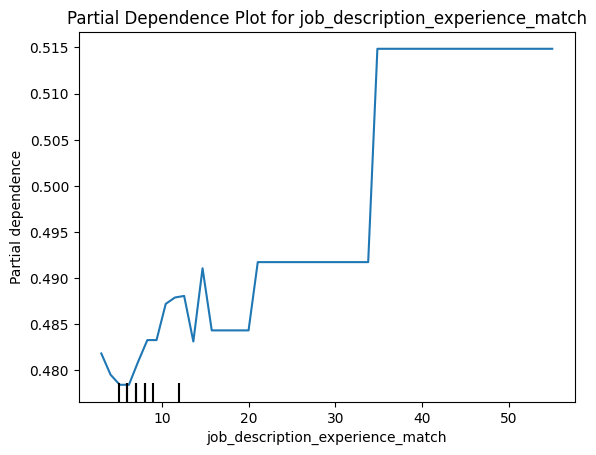

In [184]:
feature_name = "job_description_experience_match"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=catboost_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns, 
    grid_resolution=50,  
    kind="average"  # Fixed the typo here
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()



--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


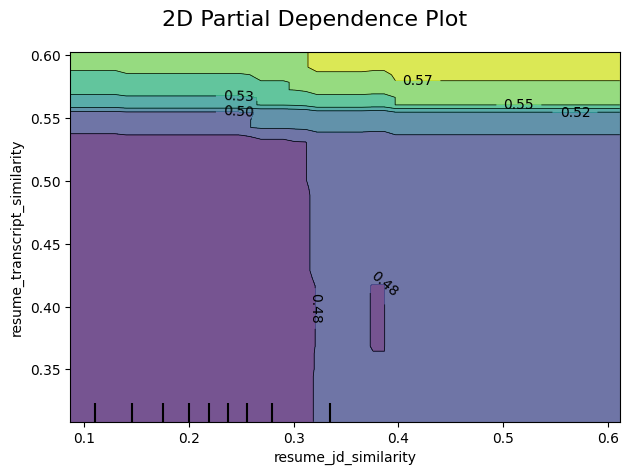

In [185]:
features = [('resume_jd_similarity', 'resume_transcript_similarity')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=catboost_best,
    X=X_train,  
    features=features, 
    grid_resolution=50,
    kind='average',
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()


--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


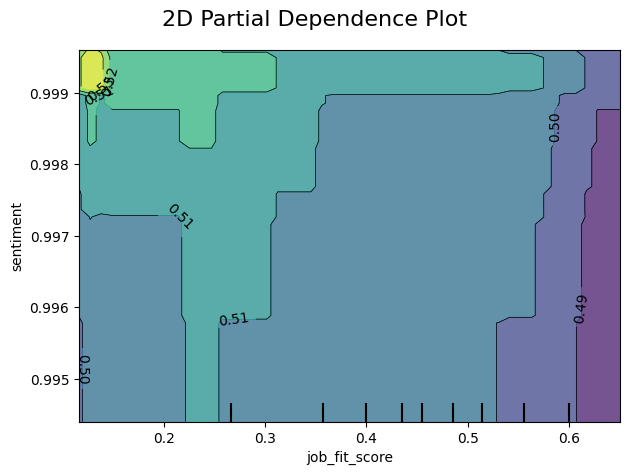

In [186]:

features = [('job_fit_score', 'sentiment')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=catboost_best, 
    X=X_train, 
    features=features,  
    grid_resolution=50, 
    kind='average', 
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

In [187]:
import nbformat
from nbconvert import PythonExporter

# Input and output file paths
input_file = "Training.ipynb"  # Replace with your .ipynb file name
output_file = "Training.py"  # Output Python script file

# Read the notebook file
with open(input_file, "r", encoding="utf-8") as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert notebook to Python script
python_exporter = PythonExporter()
python_code, _ = python_exporter.from_notebook_node(notebook_content)

# Save the converted Python script
with open(output_file, "w", encoding="utf-8") as f:
    f.write(python_code)

print(f"Notebook {input_file} has been converted to {output_file}")


Notebook Training.ipynb has been converted to Training.py
